<a href="https://colab.research.google.com/github/LJadhav25/DA---Restaurants-Swiggy-/blob/main/Restaurants_%7C_Swiggy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [259]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

In [260]:
data = files.upload()

Saving swiggy.csv to swiggy (3).csv


In [261]:
df = pd.read_csv('swiggy.csv')
df.head()

,id,name,city,rating,rating_count,cost,cuisine,lic_no,link,address,menu
0,567335,AB FOODS POINT,Abohar,--,Too Few Ratings,₹ 200,"Beverages,Pizzas",22122652000138,https://www.swiggy.com/restaurants/ab-foods-po...,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...",Menu/567335.json
1,531342,Janta Sweet House,Abohar,4.4,50+ ratings,₹ 200,"Sweets,Bakery",12117201000112,https://www.swiggy.com/restaurants/janta-sweet...,"Janta Sweet House, Bazar No.9, Circullar Road,...",Menu/531342.json
2,158203,theka coffee desi,Abohar,3.8,100+ ratings,₹ 100,Beverages,22121652000190,https://www.swiggy.com/restaurants/theka-coffe...,"theka coffee desi, sahtiya sadan road city",Menu/158203.json
3,187912,Singh Hut,Abohar,3.7,20+ ratings,₹ 250,"Fast Food,Indian",22119652000167,https://www.swiggy.com/restaurants/singh-hut-n...,"Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR",Menu/187912.json
4,543530,GRILL MASTERS,Abohar,--,Too Few Ratings,₹ 250,"Italian-American,Fast Food",12122201000053,https://www.swiggy.com/restaurants/grill-maste...,"GRILL MASTERS, ADA Heights, Abohar - Hanumanga...",Menu/543530.json


In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148541 entries, 0 to 148540
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            148541 non-null  int64 
 1   name          148455 non-null  object
 2   city          148541 non-null  object
 3   rating        148455 non-null  object
 4   rating_count  148455 non-null  object
 5   cost          148410 non-null  object
 6   cuisine       148442 non-null  object
 7   lic_no        148312 non-null  object
 8   link          148541 non-null  object
 9   address       148455 non-null  object
 10  menu          148541 non-null  object
dtypes: int64(1), object(10)
memory usage: 12.5+ MB


In [263]:
df['rating'].unique()

array(['--', '4.4', '3.8', '3.7', '3.6', '4.0', '4.2', '4.7', '4.1',
       '3.5', '3.1', '3.4', '3.3', '4.8', '3.9', '2.7', '4.3', '2.9',
       '4.5', '2.5', '3.2', '2.4', '4.6', '3.0', '2.8', '2.3', '5.0',
       '2.6', '2.2', '1.4', '1.9', '4.9', '2.1', '1.3', '2.0', '1.8',
       '1.6', '1.1', '1.5', nan, '1.0', '1.2', '1.7'], dtype=object)

In [264]:
df['rating_count'].unique()

array(['Too Few Ratings', '50+ ratings', '100+ ratings', '20+ ratings',
       '500+ ratings', '1K+ ratings', '5K+ ratings', nan, '10K+ ratings'],
      dtype=object)

# Drop the unnecessary column ['menu','address','link','lic_no']

In [265]:
df.drop(['menu','address','link','lic_no'],axis=1,inplace=True)

In [266]:
df.head()

,id,name,city,rating,rating_count,cost,cuisine
0,567335,AB FOODS POINT,Abohar,--,Too Few Ratings,₹ 200,"Beverages,Pizzas"
1,531342,Janta Sweet House,Abohar,4.4,50+ ratings,₹ 200,"Sweets,Bakery"
2,158203,theka coffee desi,Abohar,3.8,100+ ratings,₹ 100,Beverages
3,187912,Singh Hut,Abohar,3.7,20+ ratings,₹ 250,"Fast Food,Indian"
4,543530,GRILL MASTERS,Abohar,--,Too Few Ratings,₹ 250,"Italian-American,Fast Food"


# Remove Duplicates

In [267]:
df.drop_duplicates(inplace=True)
df.shape

(148541, 7)

# Data Cleaning for ['Rating','Cost']

In [268]:
df['rating'].unique()

array(['--', '4.4', '3.8', '3.7', '3.6', '4.0', '4.2', '4.7', '4.1',
       '3.5', '3.1', '3.4', '3.3', '4.8', '3.9', '2.7', '4.3', '2.9',
       '4.5', '2.5', '3.2', '2.4', '4.6', '3.0', '2.8', '2.3', '5.0',
       '2.6', '2.2', '1.4', '1.9', '4.9', '2.1', '1.3', '2.0', '1.8',
       '1.6', '1.1', '1.5', nan, '1.0', '1.2', '1.7'], dtype=object)

In [269]:
#removing '--' and nan
def replace_dash(value):
  if(value=='--'):
    return np.nan
  else:
    return float(value)

df['rating'] = df['rating'].apply(replace_dash)
df.head()

,id,name,city,rating,rating_count,cost,cuisine
0,567335,AB FOODS POINT,Abohar,NaN,Too Few Ratings,₹ 200,"Beverages,Pizzas"
1,531342,Janta Sweet House,Abohar,4.4,50+ ratings,₹ 200,"Sweets,Bakery"
2,158203,theka coffee desi,Abohar,3.8,100+ ratings,₹ 100,Beverages
3,187912,Singh Hut,Abohar,3.7,20+ ratings,₹ 250,"Fast Food,Indian"
4,543530,GRILL MASTERS,Abohar,NaN,Too Few Ratings,₹ 250,"Italian-American,Fast Food"


In [270]:
df['rating'].fillna(df['rating'].mean(),inplace=True)
df['rating'] = df['rating'].round(1)
df.head()

,id,name,city,rating,rating_count,cost,cuisine
0,567335,AB FOODS POINT,Abohar,3.9,Too Few Ratings,₹ 200,"Beverages,Pizzas"
1,531342,Janta Sweet House,Abohar,4.4,50+ ratings,₹ 200,"Sweets,Bakery"
2,158203,theka coffee desi,Abohar,3.8,100+ ratings,₹ 100,Beverages
3,187912,Singh Hut,Abohar,3.7,20+ ratings,₹ 250,"Fast Food,Indian"
4,543530,GRILL MASTERS,Abohar,3.9,Too Few Ratings,₹ 250,"Italian-American,Fast Food"


In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148541 entries, 0 to 148540
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            148541 non-null  int64  
 1   name          148455 non-null  object 
 2   city          148541 non-null  object 
 3   rating        148541 non-null  float64
 4   rating_count  148455 non-null  object 
 5   cost          148410 non-null  object 
 6   cuisine       148442 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 7.9+ MB


In [272]:
#removing 'rs sign' from column cost
def remove_rs(value):
  if isinstance(value, str):  # Check if value is a string
     value = value.replace('₹', '')
  return float(value)
df['cost'] = df['cost'].apply(remove_rs)
df.head()

,id,name,city,rating,rating_count,cost,cuisine
0,567335,AB FOODS POINT,Abohar,3.9,Too Few Ratings,200.0,"Beverages,Pizzas"
1,531342,Janta Sweet House,Abohar,4.4,50+ ratings,200.0,"Sweets,Bakery"
2,158203,theka coffee desi,Abohar,3.8,100+ ratings,100.0,Beverages
3,187912,Singh Hut,Abohar,3.7,20+ ratings,250.0,"Fast Food,Indian"
4,543530,GRILL MASTERS,Abohar,3.9,Too Few Ratings,250.0,"Italian-American,Fast Food"


#   Making cuisine type less than 1000 in frequency as others


In [273]:
cuisine = df['cuisine'].value_counts()
cuisine

cuisine
North Indian,Chinese         6471
Indian                       6414
Chinese                      5051
North Indian                 4775
Indian,Chinese               4374
                             ... 
Vietnamese,Pan-Asian            1
Healthy Food,Pan-Asian          1
Home Food,Naga                  1
Korean,Desserts                 1
Barbecue,Italian-American       1
Name: count, Length: 2132, dtype: int64

In [274]:
cuisine_less_than_1000 = cuisine[cuisine<1000]
cuisine_less_than_1000

cuisine
Pizzas,Fast Food             964
Indian,North Indian          949
Indian,Snacks                849
Indian,Biryani               836
Snacks,Beverages             810
                            ... 
Vietnamese,Pan-Asian           1
Healthy Food,Pan-Asian         1
Home Food,Naga                 1
Korean,Desserts                1
Barbecue,Italian-American      1
Name: count, Length: 2098, dtype: int64

In [275]:
def making_others(value):
  if(value in cuisine_less_than_1000):
    return 'others'
  else:
    return value

df['cuisine'] = df['cuisine'].apply(making_others)
df['cuisine'].value_counts()

cuisine
others                       72803
North Indian,Chinese          6471
Indian                        6414
Chinese                       5051
North Indian                  4775
Indian,Chinese                4374
South Indian                  3303
Bakery                        3132
Chinese,Indian                2308
Chinese,North Indian          2288
Bakery,Desserts               2233
Biryani                       2227
Pizzas                        2215
Beverages                     2157
North Indian,Indian           2004
Snacks                        1788
Fast Food                     1671
Biryani,North Indian          1644
Chinese,Snacks                1622
Fast Food,Snacks              1601
Ice Cream,Desserts            1577
Biryani,Chinese               1485
North Indian,Biryani          1458
Desserts                      1336
North Indian,South Indian     1308
Chinese,Fast Food             1275
North Indian,Snacks           1240
Biryani,Indian                1204
South Indian

In [276]:
df.head()

,id,name,city,rating,rating_count,cost,cuisine
0,567335,AB FOODS POINT,Abohar,3.9,Too Few Ratings,200.0,others
1,531342,Janta Sweet House,Abohar,4.4,50+ ratings,200.0,others
2,158203,theka coffee desi,Abohar,3.8,100+ ratings,100.0,Beverages
3,187912,Singh Hut,Abohar,3.7,20+ ratings,250.0,others
4,543530,GRILL MASTERS,Abohar,3.9,Too Few Ratings,250.0,others


# Clearing the remaining NaN value

In [277]:
df = df.dropna()
print(df)

            id                      name      city  rating     rating_count  \
0       567335            AB FOODS POINT    Abohar     3.9  Too Few Ratings   
1       531342         Janta Sweet House    Abohar     4.4      50+ ratings   
2       158203         theka coffee desi    Abohar     3.8     100+ ratings   
3       187912                 Singh Hut    Abohar     3.7      20+ ratings   
4       543530             GRILL MASTERS    Abohar     3.9  Too Few Ratings   
...        ...                       ...       ...     ...              ...   
148536  553122          The Food Delight  Yavatmal     3.9  Too Few Ratings   
148537  562647  MAITRI FOODS & BEVERAGES  Yavatmal     3.9  Too Few Ratings   
148538  559435           Cafe Bella Ciao  Yavatmal     3.9  Too Few Ratings   
148539  418989               GRILL ZILLA  Yavatmal     3.9  Too Few Ratings   
148540  447770            Lazeez kitchen  Yavatmal     3.9  Too Few Ratings   

         cost           cuisine  
0       200.0    

In [278]:
df.isnull().sum()

id              0
name            0
city            0
rating          0
rating_count    0
cost            0
cuisine         0
dtype: int64

# Final Clean Data Set

In [279]:
df.head()

,id,name,city,rating,rating_count,cost,cuisine
0,567335,AB FOODS POINT,Abohar,3.9,Too Few Ratings,200.0,others
1,531342,Janta Sweet House,Abohar,4.4,50+ ratings,200.0,others
2,158203,theka coffee desi,Abohar,3.8,100+ ratings,100.0,Beverages
3,187912,Singh Hut,Abohar,3.7,20+ ratings,250.0,others
4,543530,GRILL MASTERS,Abohar,3.9,Too Few Ratings,250.0,others


# How many restaurants are listed on Swiggy in India?

In [280]:
df_count = df['id'].count()
print('Total Restaurants which are listed on Swiggy India are:', df_count)

Total Restaurants which are listed on Swiggy India are: 148398


# How many cities are having restaurants that are listed on Swiggy?

In [281]:
df.head()

,id,name,city,rating,rating_count,cost,cuisine
0,567335,AB FOODS POINT,Abohar,3.9,Too Few Ratings,200.0,others
1,531342,Janta Sweet House,Abohar,4.4,50+ ratings,200.0,others
2,158203,theka coffee desi,Abohar,3.8,100+ ratings,100.0,Beverages
3,187912,Singh Hut,Abohar,3.7,20+ ratings,250.0,others
4,543530,GRILL MASTERS,Abohar,3.9,Too Few Ratings,250.0,others


In [282]:
city_count = df.groupby('city')['city'].count()
print('Total cities that are having restaurants listed on swiggy:',city_count.count())

Total cities that are having restaurants listed on swiggy: 821


# Which city is having the maximum number of restaurants?

In [283]:
df.head()

,id,name,city,rating,rating_count,cost,cuisine
0,567335,AB FOODS POINT,Abohar,3.9,Too Few Ratings,200.0,others
1,531342,Janta Sweet House,Abohar,4.4,50+ ratings,200.0,others
2,158203,theka coffee desi,Abohar,3.8,100+ ratings,100.0,Beverages
3,187912,Singh Hut,Abohar,3.7,20+ ratings,250.0,others
4,543530,GRILL MASTERS,Abohar,3.9,Too Few Ratings,250.0,others


In [284]:
def get_city(value):
    if ',' in value:
        x = value.index(',')
        x_sorted = value[x+1:]
        if ',' in x_sorted:
            y = x_sorted.index(',')
            y_sorted = x_sorted[y+1:]
            return y_sorted
        else:
            return x_sorted
    else:
        return value
df['city'] = df['city'].apply(get_city)
print(df['city'].head(50))

0     Abohar
1     Abohar
2     Abohar
3     Abohar
4     Abohar
5     Abohar
6     Abohar
7     Abohar
8     Abohar
9     Abohar
10    Abohar
11    Abohar
12    Abohar
13    Abohar
14    Abohar
15    Abohar
16    Abohar
17    Abohar
18    Abohar
19    Abohar
20    Abohar
21    Abohar
22    Abohar
23    Abohar
24    Abohar
25    Abohar
26    Abohar
27    Abohar
28    Abohar
29    Abohar
30    Abohar
31    Abohar
32    Abohar
33    Abohar
34    Abohar
35    Abohar
36    Abohar
37    Abohar
38    Abohar
39    Abohar
40    Abohar
41    Abohar
42    Abohar
43    Abohar
44    Abohar
45    Abohar
46    Abohar
47    Abohar
48    Abohar
49    Abohar
Name: city, dtype: object


In [285]:
city_count = df.groupby('city')['city'].count().reset_index(name='count')
city_count_sorted = city_count.sort_values(by='count', ascending=False).head(10)
city_name = city_count_sorted['city'].iloc[0]
rest_count = city_count_sorted['count'].iloc[0]
print('City which has maximum number of Restaurent:',city_name,'with',rest_count,'Restaurent')

City which has maximum number of Restaurent: Bangalore with 14943 Restaurent


# Top 10 cities as per the number of restaurants listed?

<ipython-input-286-0e3708ef9e77>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='city', y='count', data=city_count_sorted, palette='viridis')


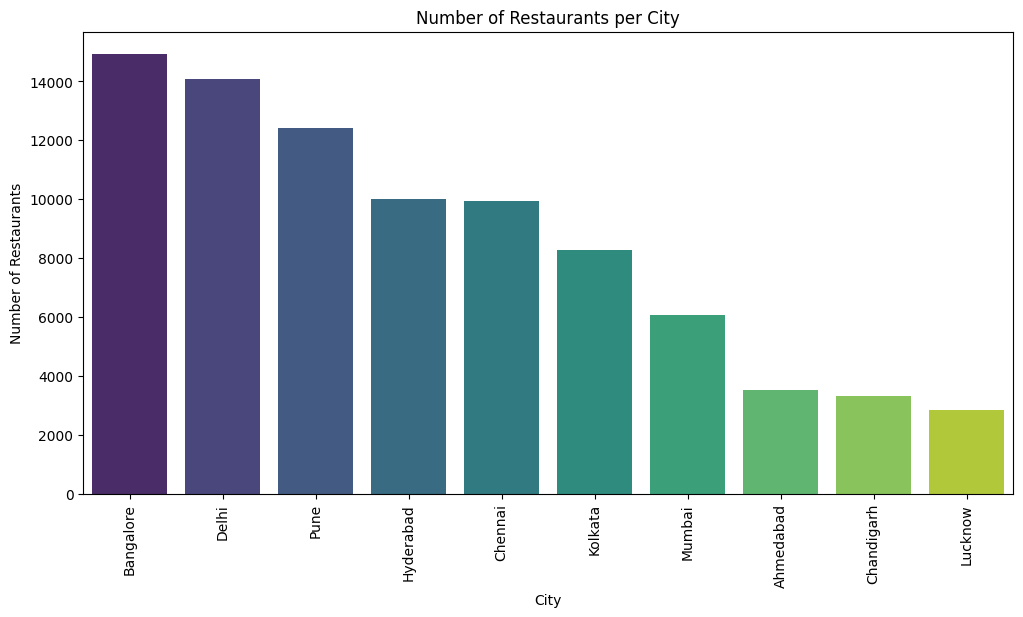

In [286]:

plt.figure(figsize=(12, 6))
sns.barplot(x='city', y='count', data=city_count_sorted, palette='viridis')
plt.xticks(rotation=90)
plt.title('Number of Restaurants per City')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.show()

# Most Popular Cuisines served throughout the dataset?

In [287]:
df['cuisine'].unique()

array(['others', 'Beverages', 'North Indian', 'Indian', 'Snacks',
       'Fast Food', 'North Indian,Chinese', 'Pizzas', 'Ice Cream',
       'North Indian,Indian', 'Chinese,Snacks',
       'North Indian,South Indian', 'Chinese,Indian', 'Beverages,Snacks',
       'Indian,Chinese', 'Bakery', 'Chinese', 'Chinese,Fast Food',
       'Biryani', 'South Indian', 'Desserts', 'Chinese,North Indian',
       'Biryani,Chinese', 'South Indian,Chinese', 'Ice Cream,Desserts',
       'Biryani,North Indian', 'South Indian,North Indian',
       'Biryani,Indian', 'Bakery,Desserts', 'Desserts,Ice Cream',
       'Fast Food,Snacks', 'Pizzas,Italian', 'North Indian,Snacks',
       'North Indian,Biryani', 'North Indian,Punjabi'], dtype=object)

In [288]:
popular = df.groupby('cuisine')['cuisine'].count().reset_index(name='count').sort_values(by='count', ascending=False).iloc[1::]

<ipython-input-289-fdcf5e3e1bde>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cuisine',y='count',data=popular, palette='viridis')


Text(0, 0.5, 'Number of Times Cuisine Ordered')

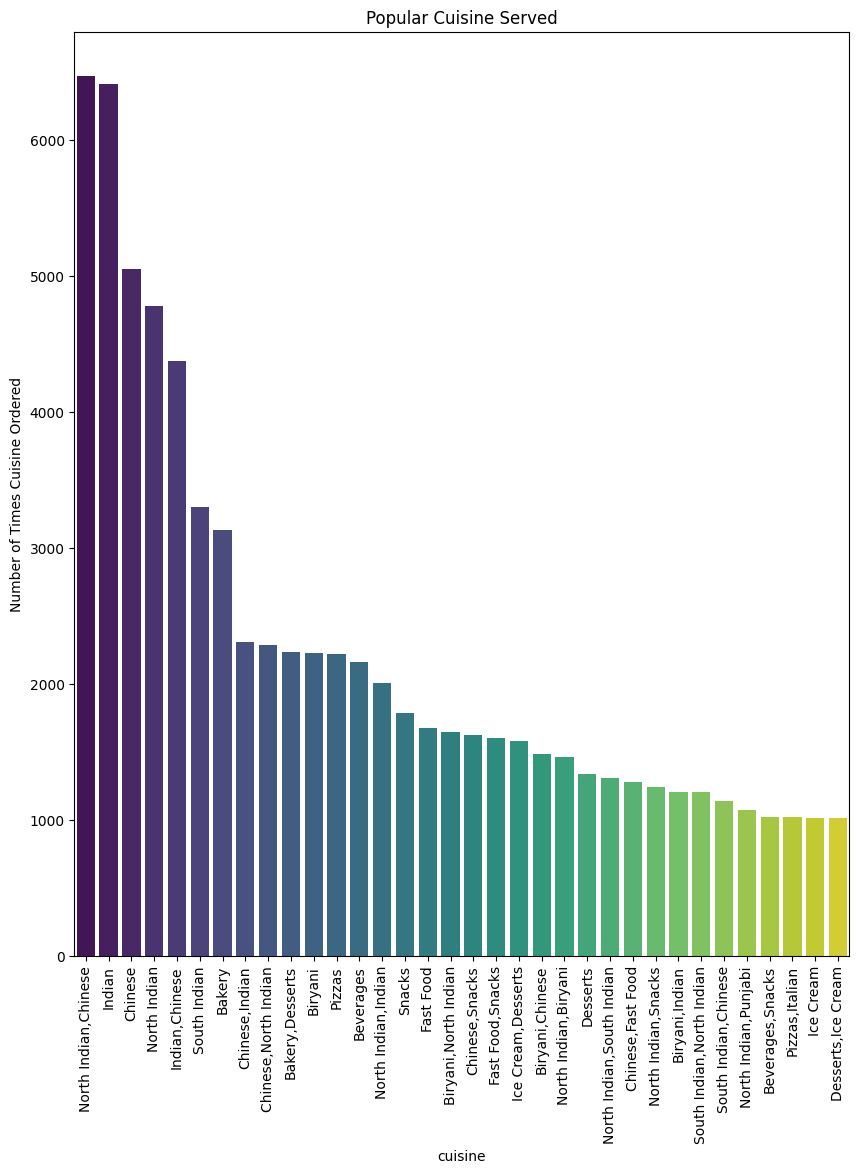

In [289]:
plt.figure(figsize=(10,12))
sns.barplot(x='cuisine',y='count',data=popular, palette='viridis')
plt.xticks(rotation=90)
plt.title('Popular Cuisine Served')
plt.xlabel('cuisine')
plt.ylabel('Number of Times Cuisine Ordered')

# Which city is having the least expensive restaurant in terms of cost?

In [290]:
df.head(10)

,id,name,city,rating,rating_count,cost,cuisine
0,567335,AB FOODS POINT,Abohar,3.9,Too Few Ratings,200.0,others
1,531342,Janta Sweet House,Abohar,4.4,50+ ratings,200.0,others
2,158203,theka coffee desi,Abohar,3.8,100+ ratings,100.0,Beverages
3,187912,Singh Hut,Abohar,3.7,20+ ratings,250.0,others
4,543530,GRILL MASTERS,Abohar,3.9,Too Few Ratings,250.0,others
5,158204,Sam Uncle,Abohar,3.6,20+ ratings,200.0,others
6,156588,shere punjab veg,Abohar,4.0,100+ ratings,150.0,North Indian
7,244866,Shri Balaji Vaishno Dhaba,Abohar,3.9,Too Few Ratings,100.0,North Indian
8,156602,Hinglaj Kachori Bhandhar,Abohar,4.2,20+ ratings,100.0,others
9,158193,yummy hub,Abohar,3.9,Too Few Ratings,200.0,Indian


In [291]:
min_cost_per_city = df.groupby('city')['cost'].min().reset_index()
city_with_least_expensive_restaurant = min_cost_per_city.loc[min_cost_per_city['cost'].idxmin()]  # By default, it returns the index for the minimum value in each column.
print('City with least expensive Restaurent:',city_with_least_expensive_restaurant.iloc[0])

City with least expensive Restaurent: Bangalore


# Top 5 most popular restaurant chains in India?

In [292]:
df.head()

,id,name,city,rating,rating_count,cost,cuisine
0,567335,AB FOODS POINT,Abohar,3.9,Too Few Ratings,200.0,others
1,531342,Janta Sweet House,Abohar,4.4,50+ ratings,200.0,others
2,158203,theka coffee desi,Abohar,3.8,100+ ratings,100.0,Beverages
3,187912,Singh Hut,Abohar,3.7,20+ ratings,250.0,others
4,543530,GRILL MASTERS,Abohar,3.9,Too Few Ratings,250.0,others


In [293]:
count_rest = df.groupby('name')['name'].count().reset_index(name='count').sort_values(by='count', ascending=False).head()

<ipython-input-294-89cec6eb74f2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='name',y='count',data=count_rest, palette='viridis')


Text(0.5, 1.0, 'Top 5 most popular restaurant chains in India')

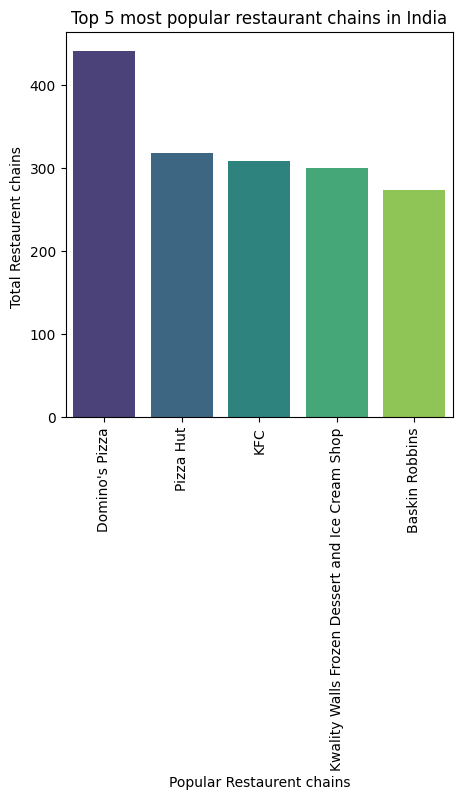

In [294]:
plt.figure(figsize=(5,5))
sns.barplot(x='name',y='count',data=count_rest, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Popular Restaurent chains')
plt.ylabel('Total Restaurent chains ')
plt.title('Top 5 most popular restaurant chains in India')

# Which restaurant in Banglore has the most number of people visited(take a number of reviews for reference)?

In [295]:
df.head()

,id,name,city,rating,rating_count,cost,cuisine
0,567335,AB FOODS POINT,Abohar,3.9,Too Few Ratings,200.0,others
1,531342,Janta Sweet House,Abohar,4.4,50+ ratings,200.0,others
2,158203,theka coffee desi,Abohar,3.8,100+ ratings,100.0,Beverages
3,187912,Singh Hut,Abohar,3.7,20+ ratings,250.0,others
4,543530,GRILL MASTERS,Abohar,3.9,Too Few Ratings,250.0,others


In [296]:
df['rating_count'].unique()

array(['Too Few Ratings', '50+ ratings', '100+ ratings', '20+ ratings',
       '500+ ratings', '1K+ ratings', '5K+ ratings', '10K+ ratings'],
      dtype=object)

In [298]:
def convert_rating_to_number(rating):
    if rating == 'Too Few Ratings':
        return 0
    elif rating == '50+ ratings':
        return 50
    elif rating == '100+ ratings':
        return 100
    elif rating == '20+ ratings':
        return 20
    elif rating == '500+ ratings':
        return 500
    elif rating == '1K+ ratings':
        return 1000
    elif rating == '5K+ ratings':
        return 5000
    elif rating == '10K+ ratings':
        return 10000
    else:
        return 0
df['rating_count_numeric'] = df['rating_count'].apply(convert_rating_to_number)
bangalore_restaurants = df[df['city'] == 'Bangalore']

most_visited_restaurant = bangalore_restaurants.loc[bangalore_restaurants['rating_count_numeric'].idxmax()]
print("Restaurant in Bangalore with the most number of people visited (based on number of reviews):")
print(most_visited_restaurant)


Restaurant in Bangalore with the most number of people visited (based on number of reviews):
id                              223
name                       Truffles
city                      Bangalore
rating                          4.4
rating_count            5K+ ratings
cost                          450.0
cuisine                      others
rating_count_numeric           5000
Name: 9578, dtype: object
